- Importing Packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn import datasets, tree, metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.inspection import permutation_importance

- Importing data set 

In [2]:
idf=pd.read_csv("nasa.csv") #read the csv file


In [3]:
idf.head()#understanding the data- First 5 rows of the data set.

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
#Last 5 rows of the data set.
idf.tail()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False
4686,3772978,3772978,19.109,0.400641,0.895860,400.640618,895.859655,0.248946,0.556661,1314.437764,...,187.642183,653.679098,0.876110,222.436688,2.071980,2.458319e+06,184.820424,0.550729,J2000,False


In [5]:
idf.columns #column names

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

- Explainig features from above

- Shape and Type of data.

In [6]:
print(f'Dataset type: {type(idf)}')         #type of the dataset
print(f'Dataset shape: {idf.shape}')        #shape of the dataset

Dataset type: <class 'pandas.core.frame.DataFrame'>
Dataset shape: (4687, 40)


- From the above,i can tell that my data set is stored as data frame which is two dimensional.
- The data set contains 4687 rows and 40 columns.

- Describing the datat set 

In [7]:
idf.describe() #summary statistics

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


- The describe() method is used to perfom statistical calculations
    - For example : let's check the column (Est Dia in M(max))
    - count-It shows the non null values and my data set has 4687 non-null values
    - mean-It shows the average value of this column and it is 457.508906 meters
    - std- The values in a which differ from the average value and its 826.391249 meters
    - min-The minimum value present in this column is 2.259644 meters
    - max- The maximum value present in this column is 34836.938254 meters

In [8]:
idf.info()   #information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

- This is the description of my nasa data set which has 4687 entries ranging from index 0 to 4686.
    - There are 40 columns in total  a mix of numerical and categorical information, with most columns being numerical (integers or floats) and a few being categorical (object or boolean): in which 30 columns has the 'float64 data type' , 5 columns has the integer data type .Additionally, the last column, Hazardous, is described as a boolean column indicating whether a particular object is hazardous or not.
    - However, there are no missing values in my data set as there are 4687 non null values.
    - My nasa data set has the information about near-Earth objects (NEOs) or asteroids, including various characteristics such as their size, shape , velocity, and it has used a memory of 1.4+ mega bytes.
    

### Distributions on relevant columns

Distribution of Absolute Magnitude

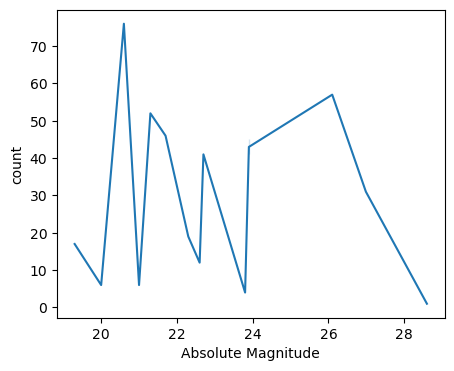

In [9]:
plt.figure(figsize= (5,4))      #setting the figure size
sns.lineplot(data= idf, x = idf['Absolute Magnitude'], y=idf['Absolute Magnitude'].value_counts())  #plotting the line plot
plt.show()      #display the plot

- The above line plot represents the distribution of absolute magnitude.
    - absolute magnitude is inversely proportional to the brightness of the celestial bodies(i.e asteroids)
        - the higher the absolute magnitude, the dimmer the object appears when viewed from a standard distance. Conversely, the lower the absolute magnitude, the brighter the object appears.
    - Only a few asteroids has the absolute magnitude less than 20 and which are brighter and easy to observe from a certain distance.

### Visualizing few more plots for better analysis

- creating a copy of the original data set for the visualization purpose so that it doesn't modify my original data set if we make any changes at the 
    time of plotting graphs.

In [10]:
idf1 = idf.copy() #copying the data set

In [11]:
idf1 #display the data set copy

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [12]:
np.random.seed(0) #setting the seed value   
data = {
    'Est Dia in KM(min)': np.random.uniform(0.1, 1.0, 100),
    'Est Dia in KM(max)': np.random.uniform(0.2, 1.2, 100),
}                           #creating a dictionary

- Histogram plot of Estimated Diameters based on max and min values.

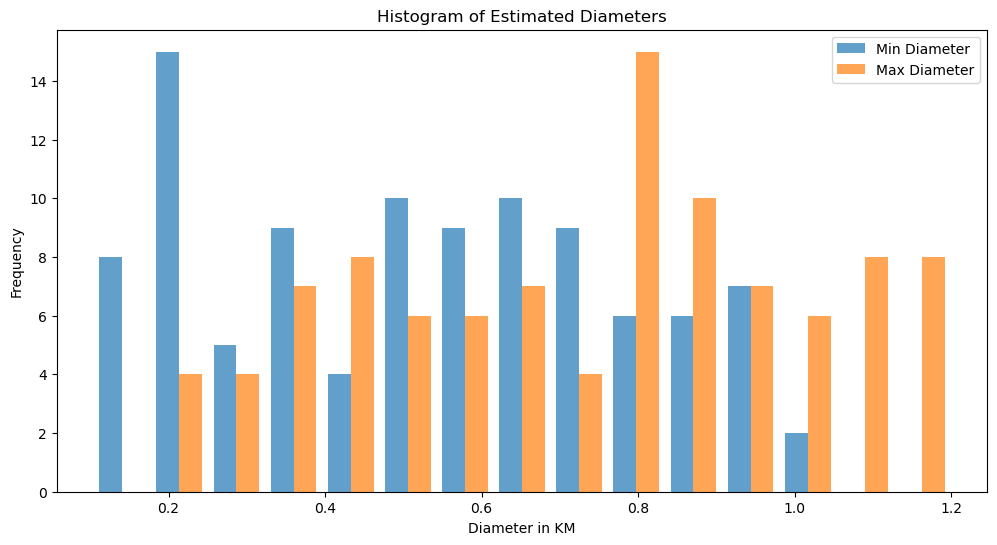

In [13]:
idf1 = pd.DataFrame(data) #creating a data frame from the data dictionary
plt.figure(figsize=(12, 6))     #setting the figure size
plt.hist([idf1['Est Dia in KM(min)'], idf1['Est Dia in KM(max)']], bins=15, alpha=0.7, label=['Min Diameter', 'Max Diameter']) #plotting the histogram
plt.xlabel('Diameter in KM')    #x-axis label
plt.ylabel('Frequency')         #y-axis label
plt.title('Histogram of Estimated Diameters')   #title of the plot
plt.legend()                #legend of the plot showing the labels
plt.show()           #display the plot



- The above histogram shows the frequency distribution of the estimated minimum and maximum diameters of asteroids. It helps us understand the range and most common sizes of these asteroids, maximum estimates generally tend to be larger, as expected.

### Checking Null Values

In [14]:
idf.isnull().sum() #checking for missing values

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

- Inside this data set we have zero null values so we dont have to worry about replacing any values.So,by this i can tell that my data set is clean.

### Dropping irrelevant columns

In [15]:
idf.columns #column names

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [16]:
df=idf.drop(columns=['Equinox','Orbiting Body','Orbit Determination Date','Close Approach Date']) #dropping the columns

- I have dropped few columns which are not required for my project which are as follows :
   - Equinox and Orbiting body has no unique values so these columns can be dropped.
   - Removing Hazardous columns as it is not required for my project.
   - Dropping the columns which are having dates as they dont help with the clustering of the project

In [17]:
df.info(),df.shape  #information about the data set and shape of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Epoch Date Close Approach     4687 non-null   int64  
 12  Relative Velocity km per sec  4687 non-null   float64
 13  Rel

(None, (4687, 36))

- Heat Map

<Axes: >

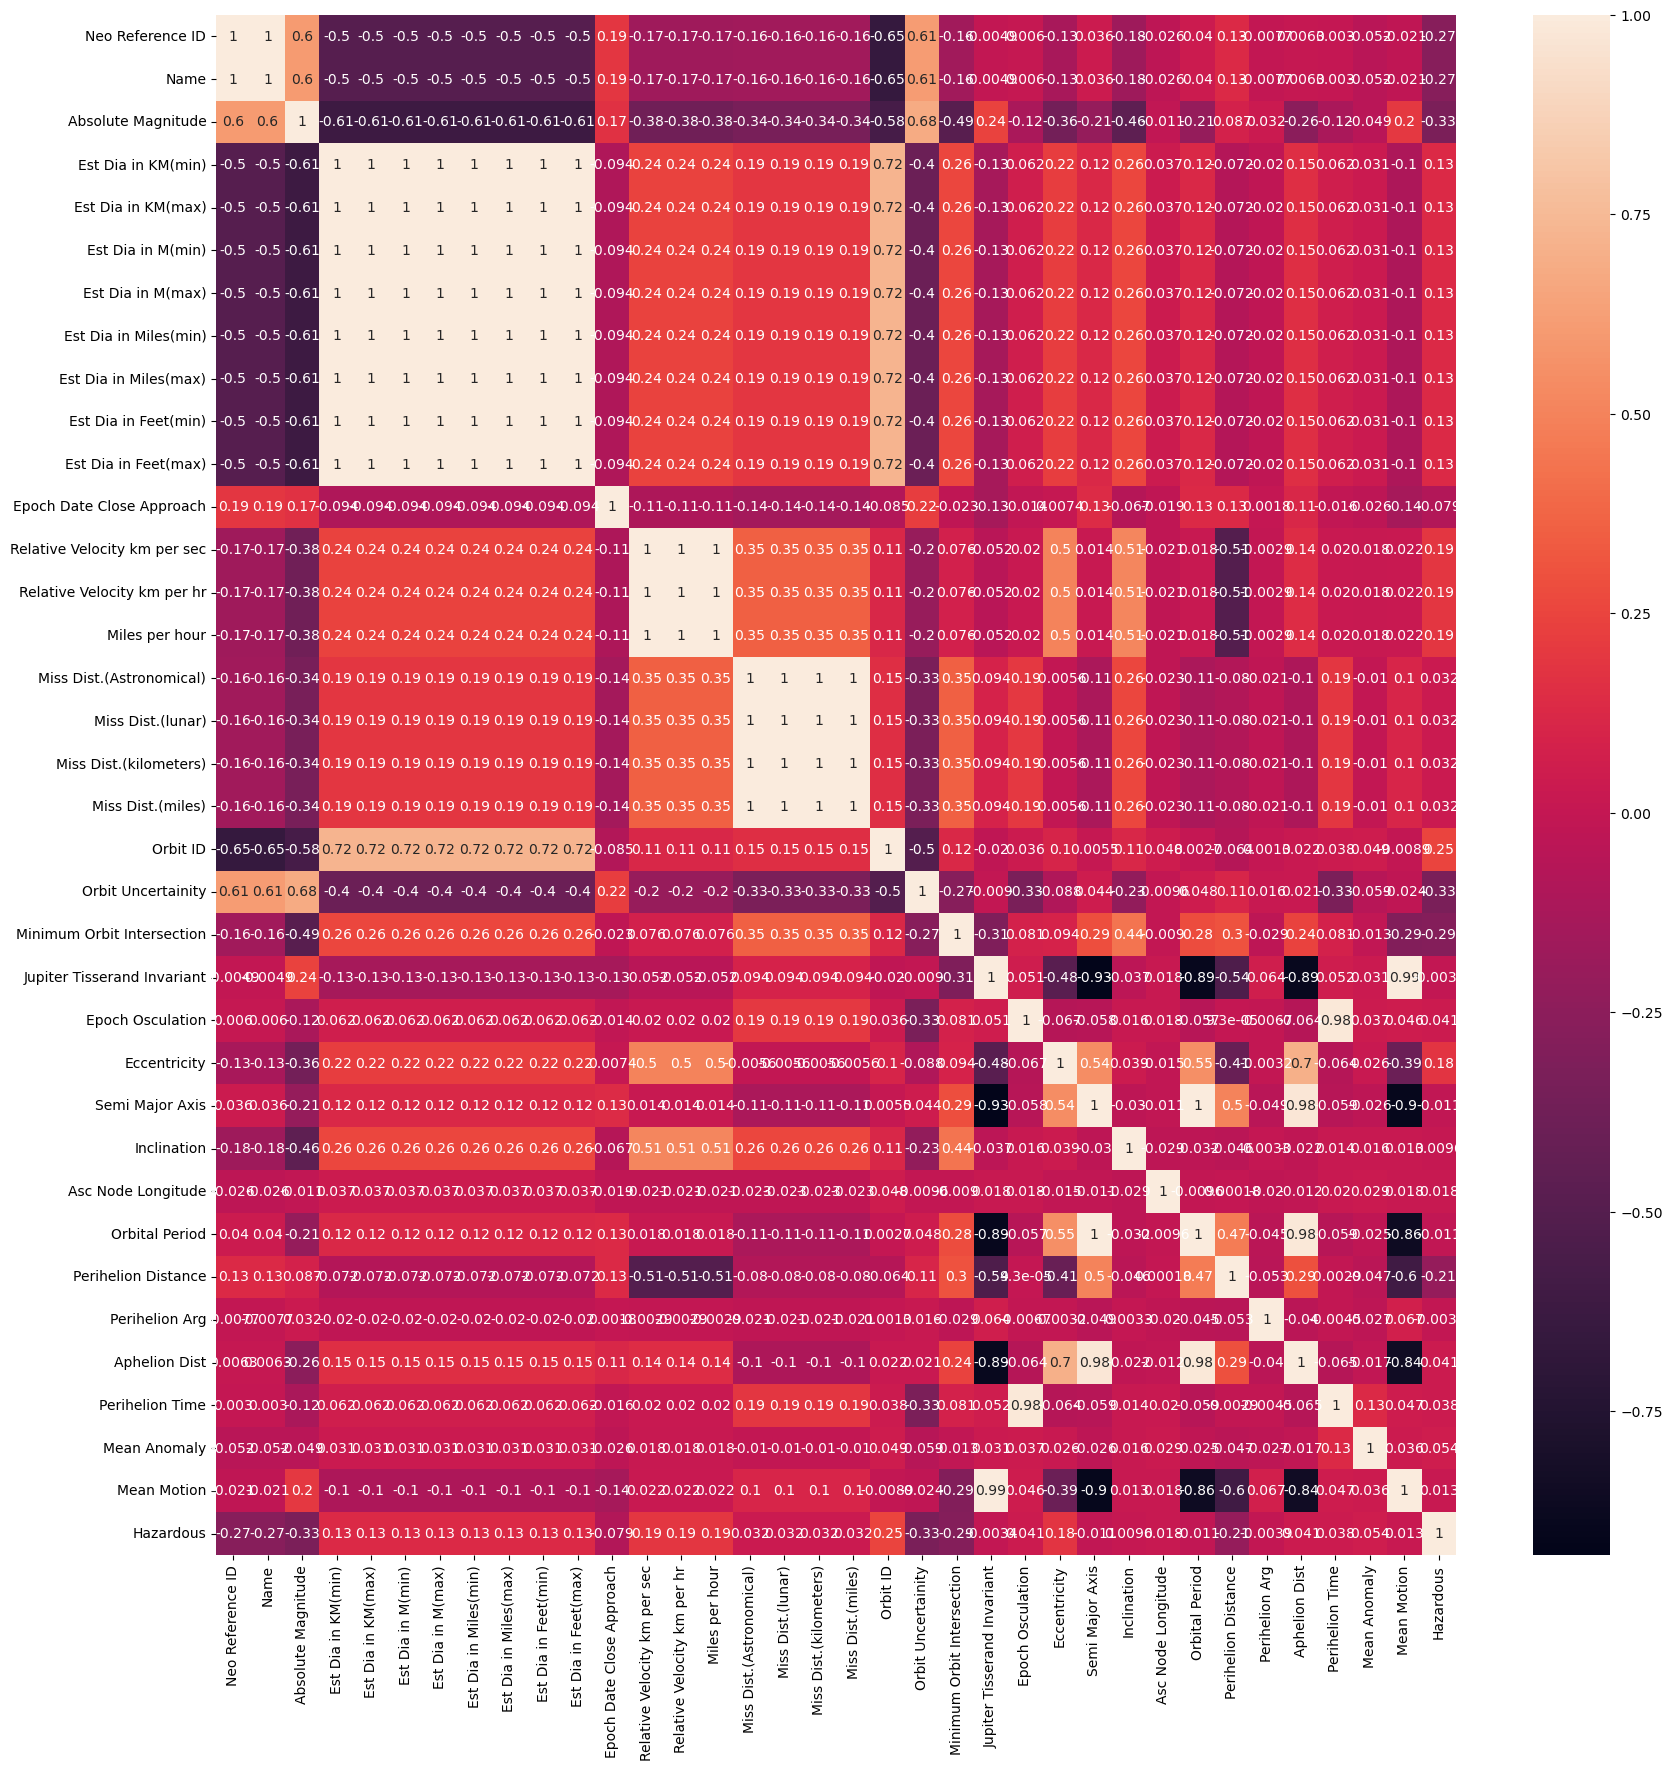

In [18]:
plt.figure(figsize=(20,20))     #setting the figure size
sns.heatmap(df.corr(),annot=True)  #plotting the heatmap

- There are many columns which are having a correlation 1 because they are identical columns with a different unit.So,they can be dropped.

In [19]:
df=df.drop(columns=['Neo Reference ID','Name','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)',
'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(min)','Est Dia in Feet(max)',
'Relative Velocity km per hr','Miles per hour','Miss Dist.(lunar)','Miss Dist.(kilometers)','Miss Dist.(miles)','Perihelion Time']) #dropping the columns

In [20]:
# Displaying the columns after dropping the columns
df 

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,788947200000,6.115834,0.419483,17,5,0.025282,4.634,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,264.837533,0.590551,True
1,21.300,0.146068,0.326618,788947200000,18.113985,0.383014,21,3,0.186935,5.457,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,173.741112,0.845330,False
2,20.300,0.231502,0.517654,789552000000,7.590711,0.050956,22,0,0.043058,4.557,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,292.893654,0.559371,True
3,27.400,0.008801,0.019681,790156800000,11.173874,0.285322,7,6,0.005512,5.093,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,68.741007,0.700277,False
4,21.600,0.127220,0.284472,790156800000,9.840831,0.407832,25,1,0.034798,5.154,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,1473318000000,22.154265,0.041361,4,8,0.019777,5.156,...,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,304.306025,0.787436,False
4683,28.200,0.006089,0.013616,1473318000000,3.225150,0.006469,2,6,0.006451,5.742,...,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,282.978786,0.884117,False
4684,22.700,0.076658,0.171412,1473318000000,7.191642,0.061009,17,6,0.059972,4.410,...,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,203.501147,0.521698,False
4685,21.800,0.116026,0.259442,1473318000000,11.352090,0.260760,6,5,0.177510,4.477,...,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,203.524965,0.543767,False


<Axes: >

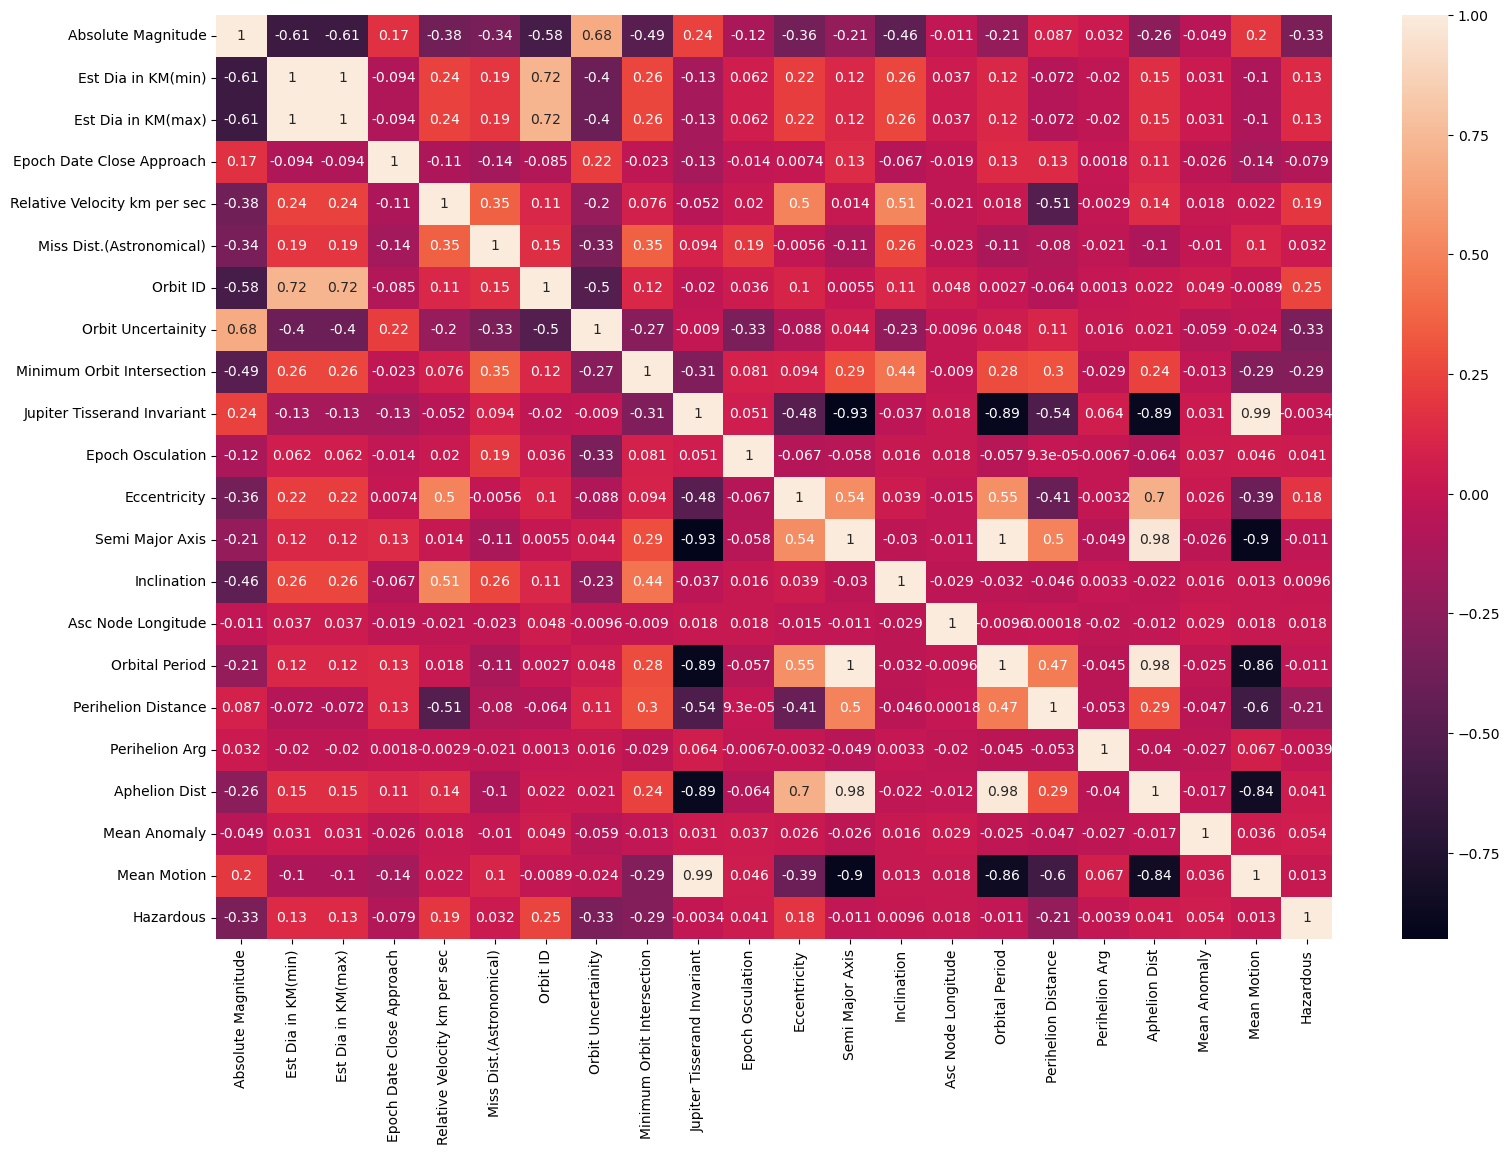

In [21]:
# relationship analysis
#corelation matrix which gives the wider perspective on the data set. a corelation matrix is a table showing corelation coefficients between variables and each cell shows that. 
# corelation matrix shows how to summarize the data as an input into a  more advance analysis and also as a diagnostic for advance analysis
plt.figure(figsize=(18,12)) #setting the figure size
sns.heatmap(df.corr(),annot=True)       #plotting the heatmap

- Box Plot

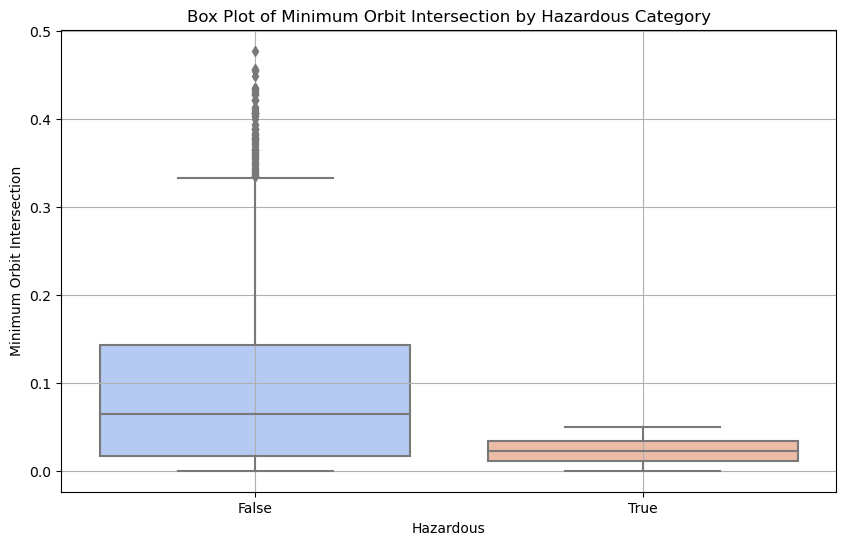

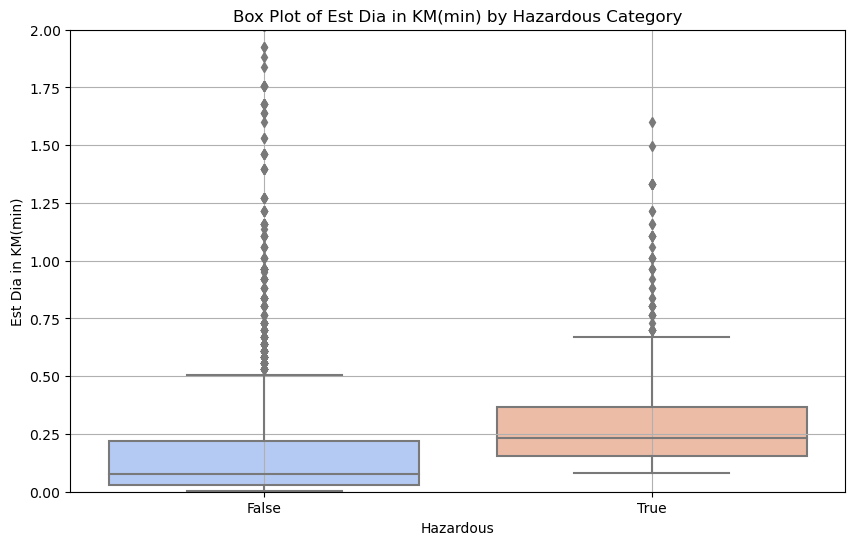

In [22]:
# Box plot for Minimum Orbit Intersection by Hazardous Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hazardous', y='Minimum Orbit Intersection', data=df, palette='coolwarm')
plt.title('Box Plot of Minimum Orbit Intersection by Hazardous Category')
plt.xlabel('Hazardous')
plt.ylabel('Minimum Orbit Intersection')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Hazardous', y='Est Dia in KM(min)', data=df, palette='coolwarm')
# Box Plot of Est Dia in KM(min) by Hazardous Category
plt.title('Box Plot of Est Dia in KM(min) by Hazardous Category')
plt.xlabel('Hazardous')
plt.ylabel('Est Dia in KM(min)')
plt.ylim(0, 2)  # Set the y-axis limits here
plt.grid(True)

# Show the plot
plt.show()

- Pie Chart 

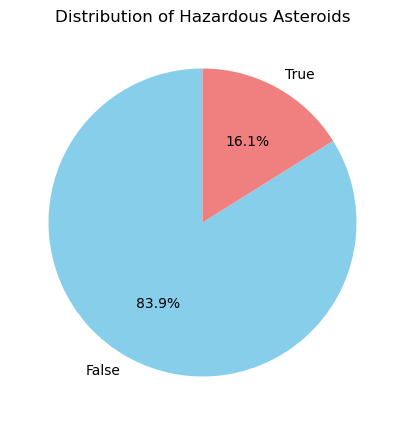

In [23]:
hazardous_counts = df['Hazardous'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Hazardous Asteroids')

plt.show() #SHOW THE PLOT

- The pie chart shows the distribution of hazardous asteroids. About 16.1% of the asteroids are classified as hazardous, while 83.9% are non-hazardous. This means the majority of asteroids are not considered a threat, but a significant portion still poses a potential risk.

In [24]:
# Show the first few rows of the cleaned DataFrame
df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

## single train-test split
    - Splits the scaled data into training and testing sets.
    - The data is split such that 30% is used for testing and 70% for training
    - The shuffle=True ensures that the data is shuffled before splitting
    - stratify=y means class distribution of the target variable is maintained in both training and testing sets
    - random_state=42 ensures reproducibility of the results

In [25]:
# Assuming 'df_class' is your DataFrame and 'Hazardous' is the target variable
X = df.drop('Hazardous', axis=1)  # Features
y = df['Hazardous']               # Target variable

# MinMaxScaler
scaler = MinMaxScaler()  

# Fit the scaler on the entire dataset and transform it
X_scaled = scaler.fit_transform(X)      #transforms all feature values to a range between 0 and 1

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,shuffle=True,stratify=y,random_state=42)
print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

# Now X_train_scaled and X_test_scaled can be used for training and testing models


(3280, 21) (3280,) (1407, 21) (1407,)


- X_train_scaled.shape: dimensions of the training feature matrix.
- y_train.shape: dimensions of the training target vector.
- X_test_scaled.shape: dimensions of the testing feature matrix.
- y_test.shape: dimensions of the testing target vector.
- Output indicates that the training set contains 3280 samples with 21 features each, and the testing set contains 1407 samples with 21 features each, which aligns with the 70-30 split specified.

### Simple baseline (no trained model)

In [26]:
# DummyClassifier as baseline model (most frequent strategy) for predicting most frequent class in the training data.
baseline_model = DummyClassifier(strategy='most_frequent') 
baseline_model.fit(X_train_scaled, y_train)                      # Fitting the baseline model on the training data
y_baseline_pred = baseline_model.predict(X_test_scaled)            # Predicting the labels for the test data 
# Calculating  metrics for the baseline model
accuracy_baseline = accuracy_score(y_test, y_baseline_pred)     #calculating accuracy
precision_baseline = precision_score(y_test, y_baseline_pred, average='weighted', zero_division=0)  #calculating precision,weighted average,avoiding zero error
recall_baseline = recall_score(y_test, y_baseline_pred, average='weighted', zero_division=0) # calculating recall score 
f1_baseline = f1_score(y_test, y_baseline_pred, average='weighted', zero_division=0)   # calculating f1 score
classification_rep_baseline = classification_report(y_test, y_baseline_pred)
# Printing metrics for the baseline model
print(f"Baseline (Most Frequent) Accuracy: {accuracy_baseline:.4f}")
print(f"Baseline (Most Frequent) Precision: {precision_baseline:.4f}")
print(f"Baseline (Most Frequent) Recall: {recall_baseline:.4f}")
print(f"Baseline (Most Frequent) F1-score: {f1_baseline:.4f}")
print("\nBaseline Classification Report:\n", classification_rep_baseline)

Baseline (Most Frequent) Accuracy: 0.8387
Baseline (Most Frequent) Precision: 0.7034
Baseline (Most Frequent) Recall: 0.8387
Baseline (Most Frequent) F1-score: 0.7651

Baseline Classification Report:
               precision    recall  f1-score   support

       False       0.84      1.00      0.91      1180
        True       0.00      0.00      0.00       227

    accuracy                           0.84      1407
   macro avg       0.42      0.50      0.46      1407
weighted avg       0.70      0.84      0.77      1407



c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ML algorithms

### k-Nearest-Neighbors

In [27]:
knn = KNeighborsClassifier(n_neighbors=6)   #K-Nearest Neighbors classifier with 6 neighbors
knn.fit(X_train_scaled, y_train)    # Fitting the KNN classifier on the training data
pred_knn = knn.predict(X_test_scaled)       # Fitting the KNN classifier on the training data
# Calculating metrics
knn_accuracy = accuracy_score(y_test, pred_knn)         # calculating accuracy score
knn_precision = precision_score(y_test, pred_knn, average='weighted', zero_division=0)      #calculating Precision
knn_recall = recall_score(y_test, pred_knn, average='weighted', zero_division=0)         # calculating recall score
knn_f1 = f1_score(y_test, pred_knn, average='weighted', zero_division=0)                  # calculating f1 score
classification_rep = classification_report(y_test, pred_knn)                    # generating classification report for knn
# Printing metrics
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-score: {knn_f1:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8678
Precision: 0.8515
Recall: 0.8678
F1-score: 0.8477

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.92      1180
        True       0.69      0.33      0.45       227

    accuracy                           0.87      1407
   macro avg       0.79      0.65      0.69      1407
weighted avg       0.85      0.87      0.85      1407



- The KNN model with 6 neighbors was trained and tested on the dataset. 
    - It achieved an accuracy of 86.78%, meaning it correctly classified 86.78% of the test samples. 
    - The model has a high precision (85.15%) and recall (86.78%), indicating good performance overall. 
    - However, it struggles to identify the 'True' class (hazardous instances), with a lower recall (33%) and F1-score (45%) for this class. This indicates that while the model performs well overall, it may need improvement in detecting hazardous instances accurately.

### Decision Tree

In [28]:
dtc = DecisionTreeClassifier()          #initializing the decision tree classifier
dtc.fit(X_train_scaled, y_train)        #Fitting the Decision Tree classifier on the training dat
pred_DT1 = dtc.predict(X_test_scaled)       # predictions on the test set using the trained Decision Tree classifier
# Calculating metrics
dtc_accuracy = accuracy_score(y_test, pred_DT1)             # calculating accuracy score
dtc_precision = precision_score(y_test, pred_DT1, average='weighted', zero_division=0)      #calculating precision
dtc_recall = recall_score(y_test, pred_DT1, average='weighted', zero_division=0)                #calculating recall score
dtc_f1 = f1_score(y_test, pred_DT1, average='weighted', zero_division=0)            #calculating f1 score
classification_rep = classification_report(y_test, pred_DT1)                 #calculating classification report
# Printing metrics
print(f"Accuracy: {dtc_accuracy:.4f}")
print(f"Precision: {dtc_precision:.4f}")
print(f"Recall: {dtc_recall:.4f}")
print(f"F1-score: {dtc_f1:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9943
Precision: 0.9943
Recall: 0.9943
F1-score: 0.9943

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1180
        True       0.99      0.98      0.98       227

    accuracy                           0.99      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       0.99      0.99      0.99      1407



- The Decision Tree model was trained and tested on the dataset. It achieved an exceptionally high accuracy of 99.43%, meaning it correctly classified 99.43% of the test samples. 
- The model shows near-perfect performance in identifying both non-hazardous and hazardous instances, with high precision, recall, and F1-scores for both classes. 
- This indicates that the Decision Tree model is very effective for this classification task.

### Decision Tree CV
     Max Tree Depth Optimization

Best max_depth: 4, Maximum accuracy: 0.9957


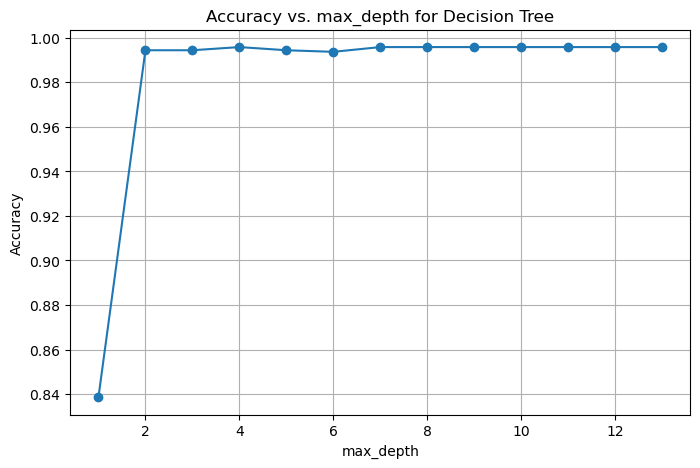

In [29]:
#Max Tree Depth Optimization
# Initialize lists to store results
accuracies = []         # list of accuracies
depths = range(1, 14) # Range of depths to test(1-13)
# Perform parameter tuning for max_depth
for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=depth)
    clf.fit(X_train_scaled, y_train)                    # Fitting the Decision Tree classifier on the training data
    y_train_pred = clf.predict(X_train_scaled)      # predicting the labels for training data
    y_test_pred = clf.predict(X_test_scaled)        #Predicting the labels for the test data
    acc = metrics.accuracy_score(y_test, y_test_pred)       #calculating accuracy 
    accuracies.append(acc)                                  # adding accuracy values to the acuracies list
# Determine the best depth based on accuracy
best_depth = depths[np.argmax(accuracies)]      #depth corresponding to the highest accuracy
max_accuracy = np.max(accuracies)               #highest accuracy value
print(f'Best max_depth: {best_depth}, Maximum accuracy: {max_accuracy:.4f}')
# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth for Decision Tree')
plt.grid(True)
plt.show()

## Decision Tree CV
     Minimal Cost Pruning

Best ccp_alpha: 0.000310, Maximum accuracy: 0.9964


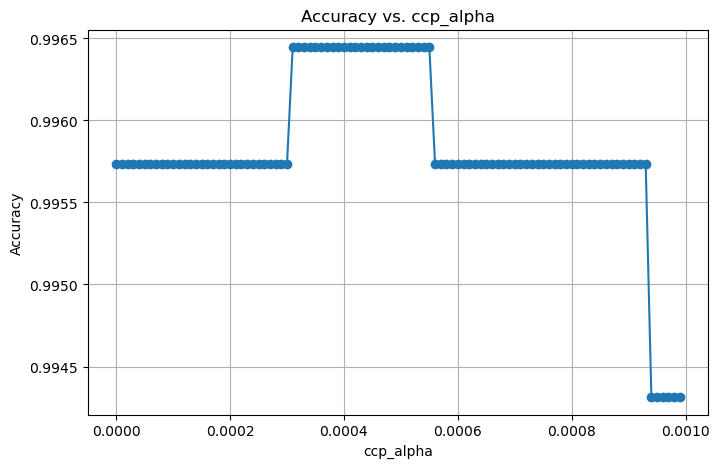

In [30]:
#Minimal Cost Pruning
# Initialize lists to store results
accuracies = [] # accuracies list
alphas = np.arange(0, 0.001, 0.00001)  #range of ccp_alpha values to test
# Perform parameter tuning for ccp_alpha
for alpha in alphas:
    clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, ccp_alpha=alpha)
    clf.fit(X_train_scaled, y_train)            # Fitting the Decision Tree classifier on the training data
    y_test_pred = clf.predict(X_test_scaled)        #Predicting the labels for the test data
    acc = metrics.accuracy_score(y_test, y_test_pred)       # Calculating the accuracy score
    accuracies.append(acc)      #adding accuracy scores to the list
# Determine the best alpha based on accuracy
best_alpha = alphas[np.argmax(accuracies)]      #alpha corresponding to the highest accuracy
max_accuracy = np.max(accuracies)               #highest accuracy value
print(f'Best ccp_alpha: {best_alpha:.6f}, Maximum accuracy: {max_accuracy:.4f}')

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(alphas, accuracies, marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. ccp_alpha')
plt.grid(True)
plt.show()


### Nested Cross Validation for Decision Tree

In [31]:
# Assuming X_scaled and y are your scaled features and target variable
# setting the best hyperparameters
best_params = {
    'criterion': 'gini',
    'max_depth': 6,
    'ccp_alpha': 0.000301
}
# Decision Tree classifier with best hyper parameter
dt = DecisionTreeClassifier(random_state=15, **best_params)
#nested cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)        #outer cross validation
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)        # inner cross validation
# Performing cross-validation
nested_scores_dt = cross_val_score(dt, X_scaled, y, cv=outer_cv, scoring='accuracy', n_jobs=-1)
y_pred = cross_val_predict(dt, X_scaled, y, cv=outer_cv, n_jobs=-1)
# Calculating metrics
mean_accuracy = nested_scores_dt.mean()     # Mean accuracy across all folds
std_accuracy = nested_scores_dt.std()        # Standard deviation of accuracy across all folds
accuracy_cv = accuracy_score(y, y_pred)          #Accuracy score
precision_cv = precision_score(y, y_pred, average='weighted')       # Weighted precision
recall_cv = recall_score(y, y_pred, average='weighted')         #weighted recall score
f1_cv = f1_score(y, y_pred, average='weighted')             #weighted f1 score

# Print accuracy for each fold
print("Accuracy for each fold:")
for i, score in enumerate(nested_scores_dt, start=1):
    print(f"Fold {i}: {score:.4f}")

# Print overall results
print(f"\nDecision Tree - Cross-Validation Mean Accuracy: {mean_accuracy:.4f}")
print(f"Decision Tree - Cross-Validation Accuracy Std Dev: {std_accuracy:.4f}")
print("\nOverall Metrics:")
print(f"Accuracy: {accuracy_cv:.4f}")
print(f"Precision: {precision_cv:.4f}")
print(f"Recall: {recall_cv:.4f}")
print(f"F1-score: {f1_cv:.4f}")

# Optional: Adding GridSearchCV for completeness
param_grid_dt = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.0001, 0.0005, 0.001, 0.005, 0.01]
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=inner_cv, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_scaled, y)

# Best parameters and score from GridSearchCV
print("\nGrid Search Best Parameters:", grid_search_dt.best_params_)
print(f"Best Accuracy from GridSearchCV: {grid_search_dt.best_score_:.4f}")

Accuracy for each fold:
Fold 1: 0.9936
Fold 2: 0.9947
Fold 3: 0.9989
Fold 4: 0.9957
Fold 5: 0.9979

Decision Tree - Cross-Validation Mean Accuracy: 0.9962
Decision Tree - Cross-Validation Accuracy Std Dev: 0.0020

Overall Metrics:
Accuracy: 0.9962
Precision: 0.9962
Recall: 0.9962
F1-score: 0.9962

Grid Search Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 7}
Best Accuracy from GridSearchCV: 0.9955


- Training a Decision Tree classifier using cross-validation to ensure reliable performance evaluation. 
- It finds the best hyperparameters and calculates accuracy, precision, recall, and F1-score. 
- The model shows high accuracy, precision, recall, and F1-score, indicating excellent performance. 
- Additionally, GridSearchCV is used to fine-tune the hyperparameters further, achieving even better results.

### Nested Cross Validation for K-Nearest Neighbors

In [32]:
# Parameter grid for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': range(1, 20),             # range of neighbor values to test
    'weights': ['uniform', 'distance'],         # weight functions types
    'metric': ['euclidean', 'manhattan']        # metric types
}
# Initialize KNN classifier
knn = KNeighborsClassifier()
# Outer and inner cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
# Nested cross-validation with parameter tuning
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=inner_cv, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_scaled, y)
# Best parameters and score
best_knn = grid_search_knn.best_estimator_
print(f"Best Parameters: {grid_search_knn.best_params_}")
print(f"Best Accuracy from GridSearchCV: {grid_search_knn.best_score_:.4f}")
# Function to evaluate metrics
def evaluate_model(model, X, y, cv):
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    precision_scores = cross_val_score(model, X, y, cv=cv, scoring='precision_weighted', n_jobs=-1)
    recall_scores = cross_val_score(model, X, y, cv=cv, scoring='recall_weighted', n_jobs=-1)
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)
    return accuracy_scores, precision_scores, recall_scores, f1_scores

# Evaluate best KNN model
accuracy_scores_knn, precision_scores_knn, recall_scores_knn, f1_scores_knn = evaluate_model(best_knn, X_scaled, y, outer_cv)

# Print accuracy for each fold, and the overall mean and standard deviation
print("Accuracy for each fold:", accuracy_scores_knn)
print(f"Mean Accuracy: {accuracy_scores_knn.mean():.4f}")
print(f"Standard Deviation of Accuracy: {accuracy_scores_knn.std():.4f}")
# Print overall metrics
print("Overall Metrics:")
print(f"Mean Precision: {precision_scores_knn.mean():.4f}")
print(f"Mean Recall: {recall_scores_knn.mean():.4f}")
print(f"Mean F1-score: {f1_scores_knn.mean():.4f}")

# Summary of results for KNN with cross-validation
knn_cv_accuracy_mean = accuracy_scores_knn.mean()
knn_cv_precision_mean = precision_scores_knn.mean()
knn_cv_recall_mean = recall_scores_knn.mean()
knn_cv_f1_mean = f1_scores_knn.mean()

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Accuracy from GridSearchCV: 0.9219
Accuracy for each fold: [0.92004264 0.92110874 0.9167556  0.92102455 0.92102455]
Mean Accuracy: 0.9200
Standard Deviation of Accuracy: 0.0017
Overall Metrics:
Mean Precision: 0.9161
Mean Recall: 0.9200
Mean F1-score: 0.9159


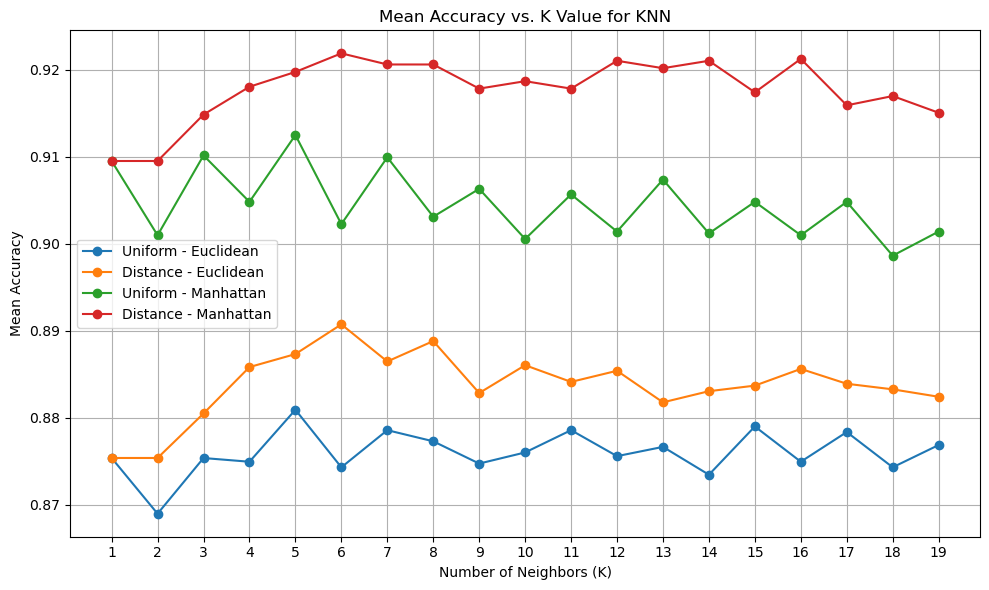

In [33]:
# Extracting mean accuracy scores for uniform and distance weights with different metrics
mean_scores = grid_search_knn.cv_results_['mean_test_score']
params = grid_search_knn.cv_results_['params']
# Lists for storing mean accuracy scores for different combinations of weights and metrics
uniform_euclidean_means = []
uniform_euclidean_means = []
distance_euclidean_means = []
uniform_manhattan_means = []
distance_manhattan_means = []

for mean_score, param in zip(mean_scores, params):
    if param['weights'] == 'uniform' and param['metric'] == 'euclidean':
        uniform_euclidean_means.append(mean_score)
    elif param['weights'] == 'distance' and param['metric'] == 'euclidean':                     # loop for mean scores
        distance_euclidean_means.append(mean_score)
    elif param['weights'] == 'uniform' and param['metric'] == 'manhattan':
        uniform_manhattan_means.append(mean_score)
    elif param['weights'] == 'distance' and param['metric'] == 'manhattan':
        distance_manhattan_means.append(mean_score)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(range(1, 20), uniform_euclidean_means, marker='o', label='Uniform - Euclidean')
plt.plot(range(1, 20), distance_euclidean_means, marker='o', label='Distance - Euclidean')      #plotting mean accuracy scores for each combination of weights and metrics
plt.plot(range(1, 20), uniform_manhattan_means, marker='o', label='Uniform - Manhattan')
plt.plot(range(1, 20), distance_manhattan_means, marker='o', label='Distance - Manhattan')

plt.title('Mean Accuracy vs. K Value for KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Accuracy')
plt.xticks(range(1, 20))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Comparision Table 

In [34]:
# Creating a DataFrame
data= {
    'Model': ['Baseline', 'KNN', 'Decision Tree', 'Decision Tree CV', 'KNN CV'],
    'Accuracy': [accuracy_baseline, knn_accuracy, dtc_accuracy, accuracy_cv, knn_cv_accuracy_mean],
    'Precision': [precision_baseline, knn_precision, dtc_precision, precision_cv, knn_cv_precision_mean],
    'Recall': [recall_baseline, knn_recall, dtc_recall, recall_cv, knn_cv_recall_mean],
    'F1 Score': [f1_baseline, knn_f1, dtc_f1, f1_cv, knn_cv_f1_mean]
}

data_frame= pd.DataFrame(data)

# Print the DataFrame
data_frame

,Model,Accuracy,Precision,Recall,F1 Score
0,Baseline,0.838664,0.703357,0.838664,0.765074
1,KNN,0.867804,0.851465,0.867804,0.847738
2,Decision Tree,0.994314,0.994301,0.994314,0.994304
3,Decision Tree CV,0.996160,0.996153,0.996160,0.996153
4,KNN CV,0.919991,0.916119,0.919991,0.915887


## Choosing the final model

- Using Decision Tree as the final model.

Decision Tree - Mean Accuracy: 0.9962 +/- 0.0020
Overall Metrics:
Accuracy: 0.9962
Precision: 0.9962
Recall: 0.9962
F1-score: 0.9962
ROC AUC: 0.9913


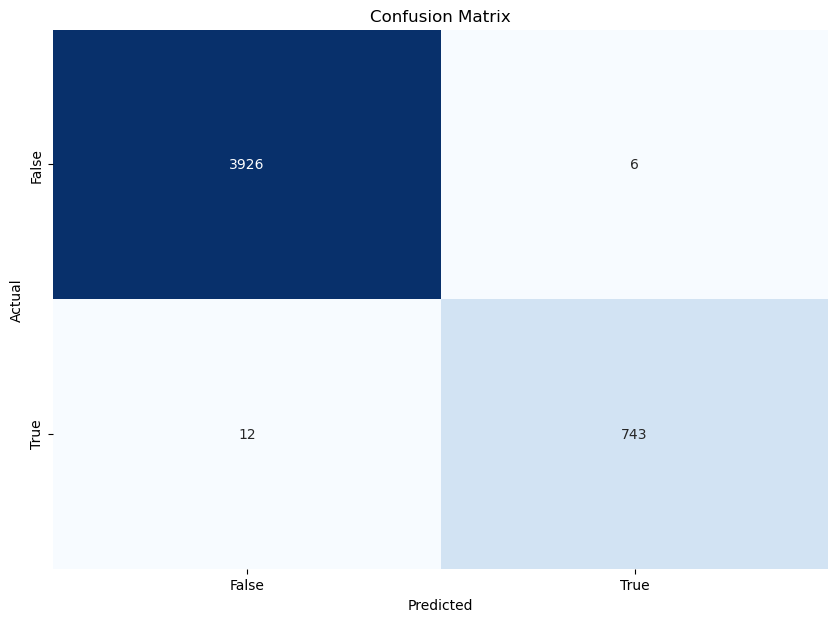

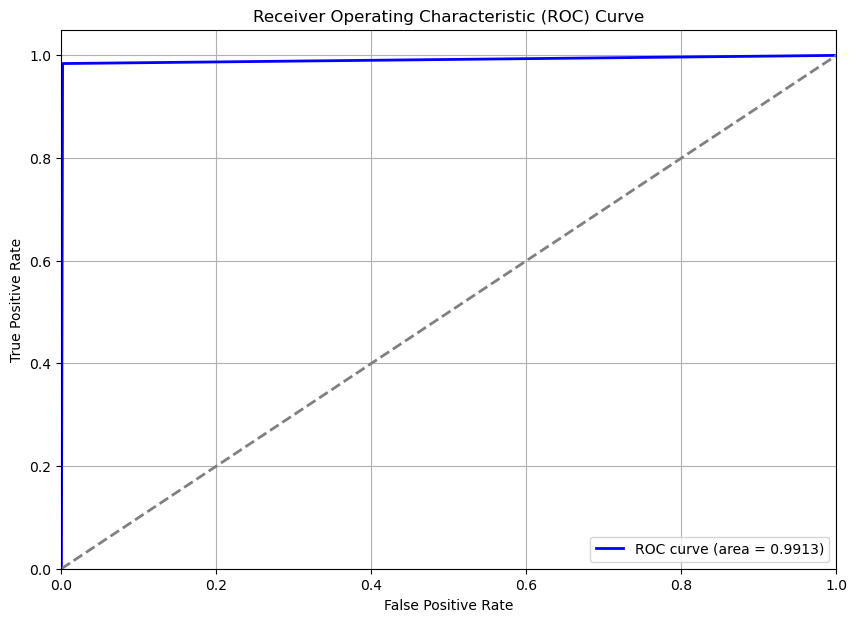

In [35]:
# Directly setting the best hyperparameters
best_params = {
    'criterion': 'gini',   # The best criterion found 
    'max_depth': 6,
    'ccp_alpha': 0.000301
}

dt = DecisionTreeClassifier(random_state=15, **best_params)

# Outer cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation
nested_scores_dt = cross_val_score(dt, X_scaled, y, cv=outer_cv, scoring='accuracy', n_jobs=-1)

# Predict using cross_val_predict to get predictions for each fold
y_pred = cross_val_predict(dt, X_scaled, y, cv=outer_cv, n_jobs=-1)

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
roc_auc = roc_auc_score(y, y_pred, average='weighted', multi_class='ovr')  

# Print the results
print(f"Decision Tree - Mean Accuracy: {nested_scores_dt.mean():.4f} +/- {nested_scores_dt.std():.4f}")
print("Overall Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_pred, pos_label=np.unique(y)[1])
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

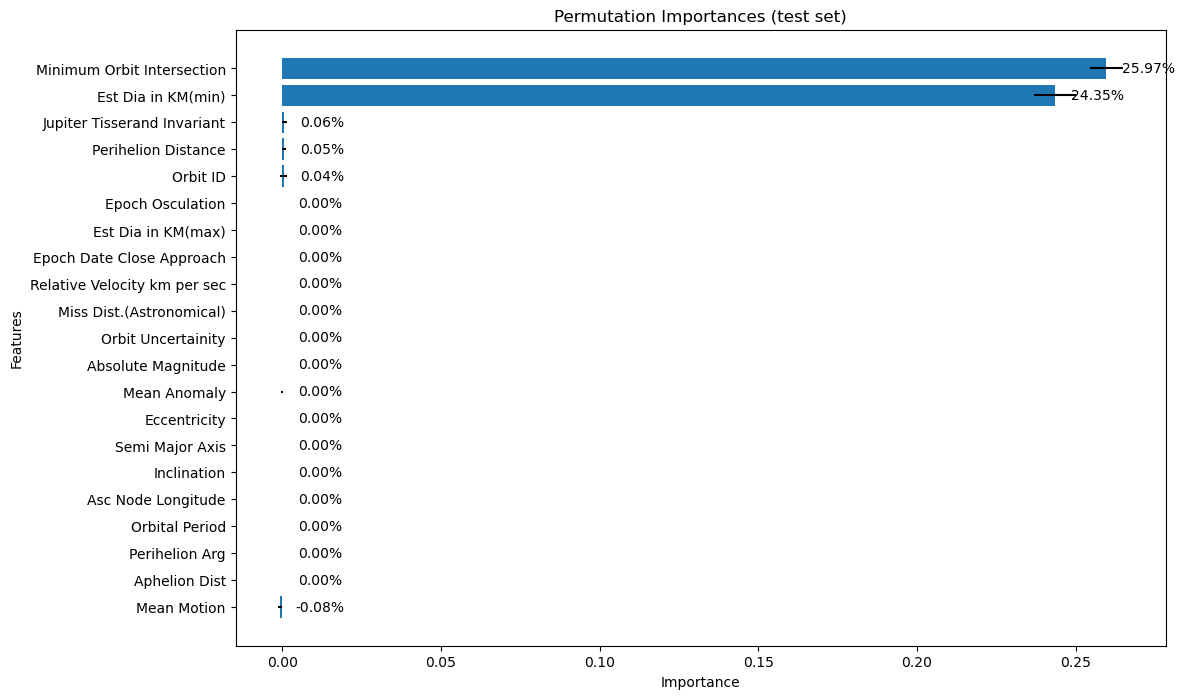

"The plot shows that Minimum Orbit Intersection Distance (MOID) and Estimated Diameter (Est Dia in KM) \nare crucial for determining if an asteroid is hazardous, with MOID being more influential at 25.97% and\nEst Dia in KM at 24.3%. MOID measures how close an asteroid's orbit approaches Earth's, \naffecting collision risk, while Estimated Diameter assesses potential impact severity based on asteroid size."

In [36]:
# Initialize Decision Tree classifier with chosen hyperparameters
best_dt = DecisionTreeClassifier(random_state=15, max_depth=6, ccp_alpha=0.000301, criterion='gini')
# Train the Decision Tree classifier on the training data
best_dt.fit(X_train_scaled, y_train)
# Compute permutation importances
result = permutation_importance(best_dt, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)
# Extract feature importances and sort indices
sorted_idx = result.importances_mean.argsort()
# Plotting feature importances as a bar graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(df.columns[sorted_idx], result.importances_mean[sorted_idx], xerr=result.importances_std[sorted_idx], align='center')
ax.set_title("Permutation Importances (test set)")
plt.xlabel('Importance')
plt.ylabel('Features')
#The bar graph with feature importance percentages
for i, v in enumerate(result.importances_mean[sorted_idx]):
    ax.text(v + 0.005, i, f'{v*100:.2f}%', va='center')

plt.show()
"""The plot shows that Minimum Orbit Intersection Distance (MOID) and Estimated Diameter (Est Dia in KM) 
are crucial for determining if an asteroid is hazardous, with MOID being more influential at 25.97% and
Est Dia in KM at 24.3%. MOID measures how close an asteroid's orbit approaches Earth's, 
affecting collision risk, while Estimated Diameter assesses potential impact severity based on asteroid size."""

